## Функция активации. Что это и зачем
Нейрон принимает множество сигналов на вход и обрабатывает их так, чтобы получить полезный результат на выходе. Поскольку нейроны связаны друг с другом, этот результат может быть передан связанному нейрону в качестве входных данных, образуя сеть.

Нейрон внутри просто вычисляет взвешенную сумму своих входных данных. Ключевое фраза здесь - "взвешенная сумма". Он умножает все входные данные на определенный параметр, называемый весом. Эти веса вычисляются в процессе обучения.

Искусственный нейрон имеет два основных свойства: weight (вес) и bias (смещение - подробнее позже). Он делает линейное преобразование всех входных данных (output_1 = weight * input_1 + bias или же y=ax+b).

В итоге таких преобразований мы зачастую не сможем получить нужный результат т.к много процессов нелинейны. Для решения это проблемы мы используем функции активации. Они добавляют нелинейность в сеть. В её добавлением полное преобразование нейрона будет выглядеть так:
output = activation_function(sum(weight * inputs + bias)) 

### Bais нейрон

По сути, bais нейрон позволяет вам сдвинуть функцию активации влево или вправо, что может иметь решающее значение для успешного обучения. Изменение веса w0 существенно изменяет "крутизну" сигмоиды.

Сеть:

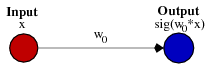

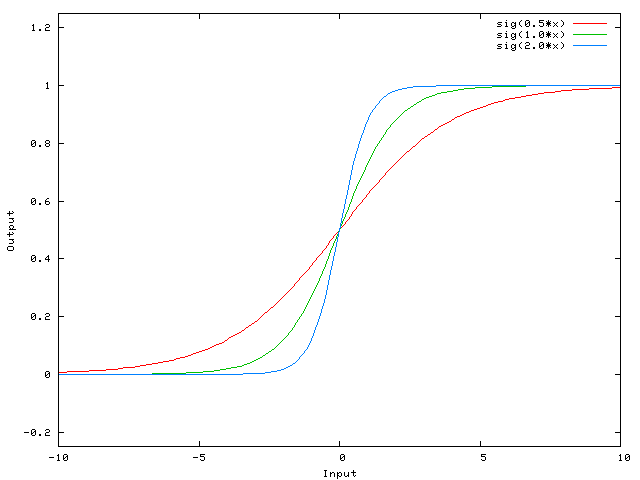

Это полезно, но что, если бы вы хотели, чтобы сеть выводила 0, когда x равно 2? Простое изменение крутизны сигмоиды на самом деле не сработает - вы хотите иметь возможность сдвинуть всю кривую вправо. Это именно то, что смещение позволяет вам делать.

Сеть:

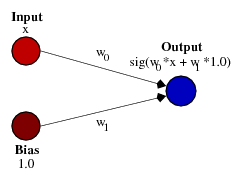

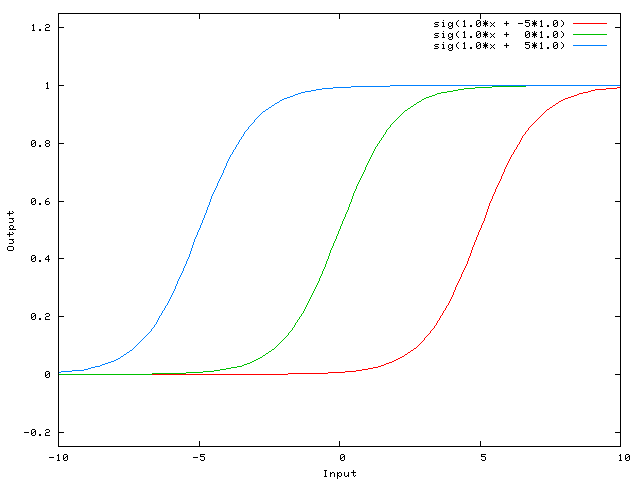

## Типы функций активации и их использование

### Сигмойда
Сигмоидная функция активации - это нелинейная функция, которая преобразует любое входное значение в значение от 0 до 1. Эта функция активации часто используется в нейронных сетях для задач бинарной классификации.

Функция:f(x) = 1/(1+e^-x)

Плюсы:

Минусы:

1. ресурсоёмкие вычисления
2. проблема затухающего градиента

Проблема затухающего градиента- крайне нежелательное свойство сигмоиды, когда при насыщении функции с той или иной стороны (0 или 1), градиент на этих участках становится близок к нулю

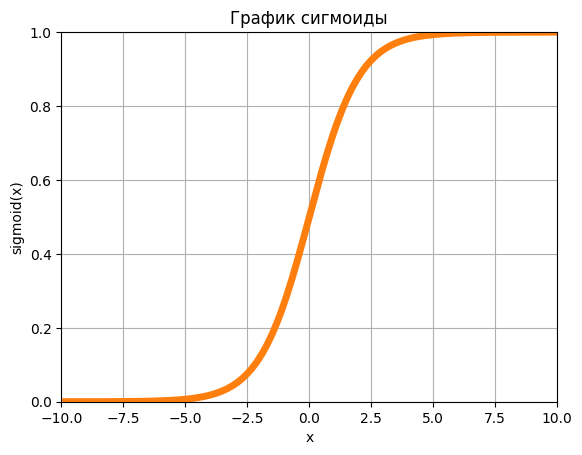

In [2]:
###############График сигмоиды
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры сигмоиды
x = np.linspace(-100, 100, 1000)
y = 1 / (1 + np.exp(-x))

# Строим график
plt.plot(x, y)

# Настраиваем оси координат и заголовок
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('График сигмоиды')

# Настраиваем значения осей координат
plt.xlim(-10, 10)
plt.ylim(0, 1)

# Строим график, настраиваем ширину линии и добавляем сетку
plt.plot(x, y, linewidth=5)
plt.grid(True)

# Отображаем график
plt.show()

### ReLU

ReLU (Rectified Linear Unit) - нелинейная функция активации, которая преобразует входное значение в значение от 0 до +∞. Если входное значение меньше или равно нулю, то ReLU выдает ноль, в противном случае - входное значение.

Функция:f(x)=max(0,x)

Плюсы:
1. не ресурсоёмкая
2. Не подвержен насыщению.

Минусы:
1. проблема мёртвого нейрона
2. имеет проблему взрывающегося градиента

Прблема мёртвого нейрона-когда нейрон всегда выдаёт одно и то же значение. Зачастую это происходит из за большого отрицательного значения нейрона смещения(bias).

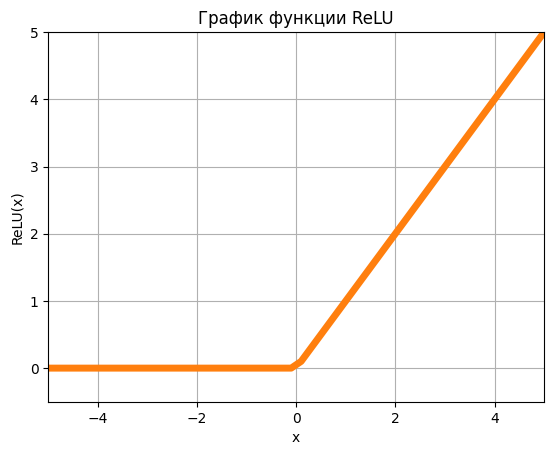

In [1]:
###############График ReLU
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры сигмоиды
x = np.linspace(-100, 100, 1000)
y = np.maximum(x, 0)

# Строим график
plt.plot(x, y)

# Настраиваем оси координат и заголовок
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('График функции ReLU')

# Настраиваем значения осей координат
plt.xlim(-5, 5)
plt.ylim(-0.5, 5)

# Строим график, настраиваем ширину линии и добавляем сетку
plt.plot(x, y, linewidth=5)
plt.grid(True)

# Отображаем график
plt.show()

### Leaky ReLU

Leaky ReLU (Rectified Linear Unit) - нелинейная функция активации, которая возвращает само значение при положительном входном значении, а при отрицательных значениях возвращает входное значение умноженное на небольшой коэффициент, называемый отрицательным уклоном (leak). Таким образом решается проблема мёртвого нейрона.

Функция:f(x)=max(k*x,x)

Плюсы:
1. не ресурсоёмкая
2. не имеет проблемы затухающего градиента
3. не имеет проблемы мёртвого нейрона

Минусы:
1. немного более ресурсоёмкий чем ReLU
2. имеет проблему взрывающегося градиента

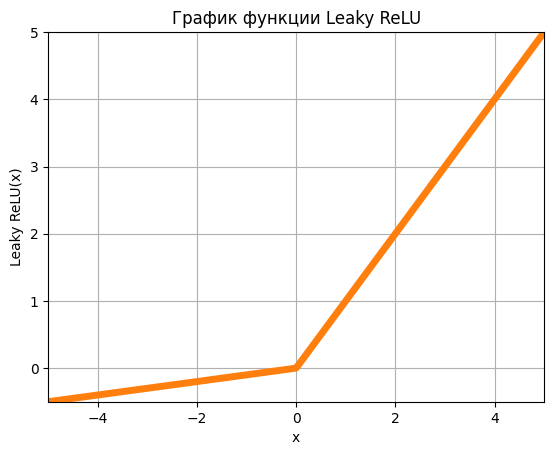

In [5]:
###############График Leaky ReLU, k=0.1
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры функции Leaky ReLU
x = np.linspace(-10, 10, 1000)
k = 0.1
y = np.where(x > 0, x, k*x)

# Строим график
plt.plot(x, y)

# Настраиваем оси координат и заголовок
plt.xlabel('x')
plt.ylabel('Leaky ReLU(x)')
plt.title('График функции Leaky ReLU')

# Настраиваем значения осей координат
plt.xlim(-5, 5)
plt.ylim(-0.5, 5)

# Строим график, настраиваем ширину линии и добавляем сетку
plt.plot(x, y, linewidth=5)
plt.grid(True)

# Отображаем график
plt.show()

### ELU

ELU (Exponential Linear Unit) - нелинейная функция активации, которая возвращает исходное значение входа если он больше нуля. Если значение входа меньше или равно нулю, то ELU использует экспоненциальную функцию, чтобы получить значение, которое ближе к нулю, чем значение, возвращаемое ReLU. Это позволяет избежать мертвых нейронов.также она имеет свойство гладкости, которое так же помогает избежать проблемы "взрывающегося градиента" (exploding gradient), которая может возникать при использовании других функций активации.

Функция:f(x)=(x при x>0;a(e^x-1) при x<=0)

Плюсы:Нету проблемы умирающего нейрона, взрывающегося и затухающег градиента.

Минуты:более ресурсоёмкий чем ReLU



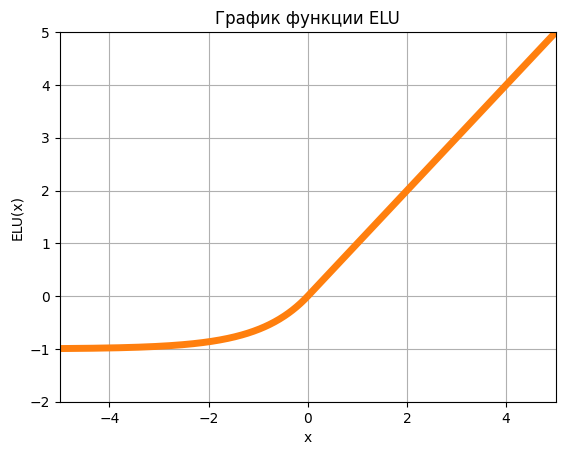

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры функции ELU
x = np.linspace(-10, 10, 1000)
alpha = 1.0
y = np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Строим график
plt.plot(x, y)

# Настраиваем оси координат и заголовок
plt.xlabel('x')
plt.ylabel('ELU(x)')
plt.title('График функции ELU')

# Настраиваем значения осей координат
plt.xlim(-5, 5)
plt.ylim(-2, 5)

# Строим график, настраиваем ширину линии и добавляем сетку
plt.plot(x, y, linewidth=5)
plt.grid(True)

# Отображаем график
plt.show()

### Гиперболический тангенс

Гиперболический тангенс - это нелинейная функция, которая принимает входные значения и преобразует их в диапазон от -1 до 1. Он используется как для классификации, так и для регрессии, а также для обработки изображений и других типов данных.

Функция:f(x)=(e^x-e^-x)/(e^x+e^-x)

Плюсы:По сравнению со сигмоидальной функцией, гиперболический тангенс имеет более пологую кривую, что позволяет сети лучше распознавать сложные зависимости в данных. Также гиперболический тангенс имеет гладкую производную, что позволяет использовать алгоритмы оптимизации, которые требуют вычисления градиента.

Минусы:
1. ресурсоёмкие вычисления
2. проблема затухающего градиента

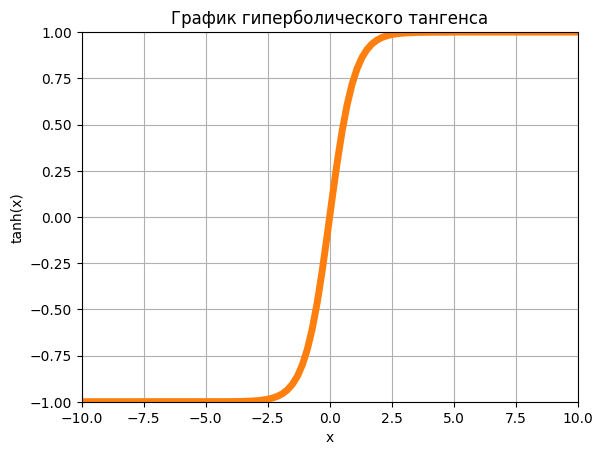

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры сигмоиды
x = np.linspace(-100, 100, 1000)
y = np.tanh(x)

# Строим график
plt.plot(x, y)

# Настраиваем оси координат и заголовок
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('График гиперболического тангенса')

# Настраиваем значения осей координат
plt.xlim(-10, 10)
plt.ylim(-1, 1)

# Строим график, настраиваем ширину линии и добавляем сетку
plt.plot(x, y, linewidth=5)
plt.grid(True)

# Отображаем график
plt.show()

### Softmax

Она принимает список произвольных чисел и преобразует их в список вероятностей пропорциональных этим числам.

Допустим, у нас есть список [1, 2, 3]:

softmax([1, 2, 3]) = [0.09003, 0.24473, 0.66524]

Это делает функцию softmax особенно полезной для задач классификации в нейронных сетях когда 2 и более вариантов итогового ответа.


### Так что лучше выбрать?

Выбор подходящего слоя зависит от структуры и архитектуры нейронной сети, а также от данных, на которых обучают модель.
Вот несколько рекомендаций:

Для задач классификации, используйте Softmax, если вы хотите получить вероятности классов в качестве выходных данных. Используйте Sigmoid или Tanh, если вы хотите получить двоичный вывод.

Для задач регрессии, используйте ReLU или его модификации. Они обычно дают лучшую производительность в задачах регрессии.

Для моделей глубокого обучения, ReLU является общим выбором для скрытых слоев, так как она может ускорить обучение, но можно также использовать другие функции.

Для рекуррентных нейронных сетей обычно используются функции активации Tanh.

Если вы не уверены что выбрать то попробуйте использовать несколько функций активации и сравните их производительность.